In [1]:
import dill
import math
import numpy as np
from pprint import pprint
from bayes_opt import BayesianOptimization
from datetime import datetime as dt

delays = {}

exec(open('utils.py').read())
print('Loaded')

MAX_YEAR = CURRENT_YEAR + 100 # CURRENT_YEAR defined in utils.py
years = list(range(CURRENT_YEAR, MAX_YEAR))

Loaded


## Algorithms/insights delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.04261  | 6.005     | 7.884     | 9.902     |
| 3         | -0.03989  | 4.066     | 9.327     | 8.969     |
| 4         | -0.03744  | 0.8454    | 7.428     | 4.145     |
| 10        | -0.01764  | 1.773     | 5.107     | 0.3297    |
| 43        | -0.01223  | 1.284     | 4.47      | 0.4042    |
| 56        | -0.007506 | 1.074     | 4.665     | 0.3919    |
| 57        | -0.004921 | 0.7871    | 4.813     | 0.5348    |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


Curve params found
{'push': 0.7871153195362566,
 'shift': 4.813172753965903,
 'slope': 0.5348152652973945}
-
## Chance of nonscaling delay ##


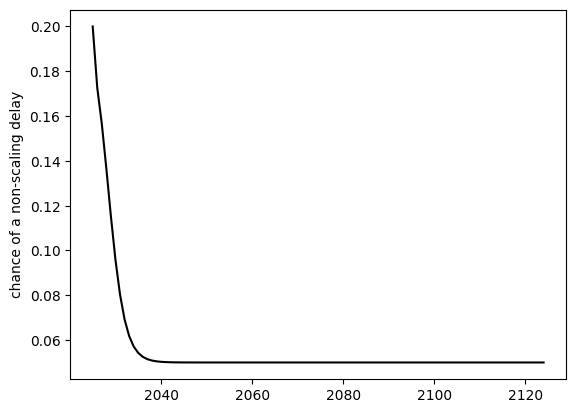

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 20%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 17%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 16%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 14%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 12%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 10%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 8%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 7%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 6%
Year: 2035 - c

In [2]:
nonscaling_points = [(2024, 0.2),
                     (2027, 0.15),
                     (2030, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['algorithms'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(2, 5)], [0.1, sq.lognorm(2, 20)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['algorithms']['length'] @ 1000, digits=0))

## Infrastructure delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.2724   | 2.148     | 2.986     | 2.088     |
| 3         | -0.2485   | 1.984     | 9.652     | 2.274     |
| 4         | -0.24     | 0.0884    | 3.866     | 6.238     |
| 19        | -0.2346   | 0.5308    | 1.663     | 2.17      |
| 37        | -0.2291   | 0.4698    | 2.757     | 2.195     |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


| 54        | -0.1333   | 0.01      | 2.36      | 2.682     |
| 57        | -0.1024   | 0.01      | 2.236     | 2.365     |
| 82        | -0.09455  | 0.01      | 2.135     | 1.423     |
| 88        | -0.07236  | 0.08334   | 1.94      | 0.858     |
| 92        | -0.04791  | 0.1854    | 1.8       | 0.4481    |
| 110       | -0.03574  | 0.3235    | 2.466     | 0.4039    |
Curve params found
{'push': 0.3235144097617166,
 'shift': 2.465758255872291,
 'slope': 0.40385159697059614}
-
## Chance of nonscaling delay ##


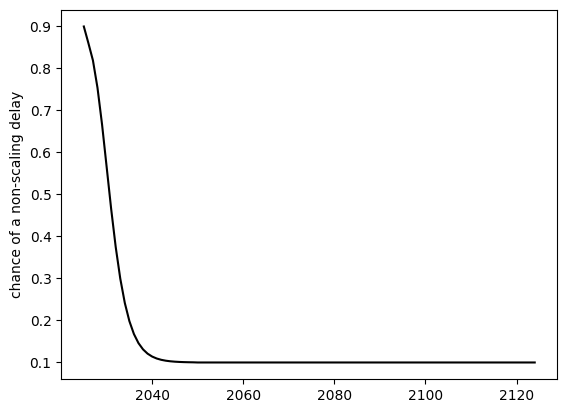

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 90%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 86%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 82%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 75%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 67%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 57%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 47%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 37%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 30%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 24%
Year: 2035

In [3]:
# https://twitter.com/ohlennart/status/1645058017119854592
# https://asteriskmag.com/issues/03/the-transistor-cliff
nonscaling_points = [(2024, 0.9),
                     (2027, 0.8),
                     (2030, 0.5),
                     (2040, 0.2),
                     (2050, 0.1)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['infra'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 15)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['infra']['length'] @ 1000, digits=0))

## Data delay

|   iter    |  target   |   push    |   shift   |   slope   |
-------------------------------------------------------------
| 2         | -0.13     | 0.7678    | 3.229     | 3.924     |
| 11        | -0.13     | 0.6641    | 0.9755    | 6.401     |


<string>:64: RuntimeWarning: overflow encountered in scalar power


| 41        | -0.13     | 0.01      | 10.0      | 10.0      |


<string>:64: RuntimeWarning: overflow encountered in scalar power


| 42        | -0.13     | 0.01      | 5.359     | 10.0      |


<string>:64: RuntimeWarning: overflow encountered in scalar power


| 44        | -0.13     | 0.01      | 0.01      | 10.0      |


<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power
<string>:64: RuntimeWarning: overflow encountered in scalar power


Curve params found
{'push': 0.01, 'shift': 0.01, 'slope': 10.0}
-
## Chance of nonscaling delay ##


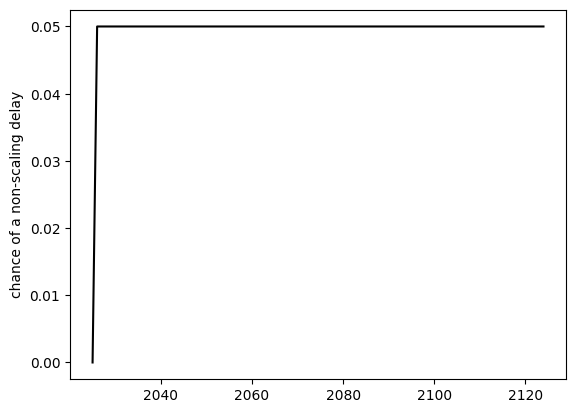

Year: 2025 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 0%
Year: 2026 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2027 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2028 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2029 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2030 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2031 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2032 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2033 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2034 - chance of a nonscaling delay if TAI compute needs are otherwise met in this year: 5%
Year: 2035 - chance 

In [4]:
nonscaling_points = [(2024, 0),
                     (2027, 0.4),
                     (2030, 0.3),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['data'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.9, sq.lognorm(1, 8)], [0.1, sq.lognorm(3, 10)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['data']['length'] @ 1000, digits=0))

## Robotics need delay

In [5]:
"""
nonscaling_points = [(2024, 0.3),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['robotics'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.85, sq.lognorm(1, 5)],
                                                                        [0.15, sq.lognorm(1, 15)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['robotics']['length'] @ 1000, digits=0))
"""
None

## Integration delay

In [6]:
"""
# https://twitter.com/MatthewJBar/status/1653461856919654400
nonscaling_points = [(2024, 0.4),
                     (2030, 0.2),
                     (2040, 0.1),
                     (2050, 0.05)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['integration'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(3, 30)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['integration']['length'] @ 1000, digits=0))
"""
None

##  Real world feedback delay

In [7]:
"""
nonscaling_points = [(2024, 0.1),
                     (2030, 0.05),
                     (2050, 0.02)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['real_world_feedback'] = {'prob': p_nonscaling_delay, 'length': sq.mixture([[0.8, sq.lognorm(3, 10)],
                                                                                   [0.1, sq.lognorm(10, 30)],
                                                                                   [0.1, sq.lognorm(20, 50)]])}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['real_world_feedback']['length'] @ 1000, digits=0))
"""
None

## Take off speeds

In [8]:
"""
# https://www.lesswrong.com/posts/Gc9FGtdXhK9sCSEYu/what-a-compute-centric-framework-says-about-ai-takeoff
nonscaling_points = [(2024, 0.7),
                     (2030, 0.5),
                     (2050, 0.35),
                     (2080, 0.2)]
p_nonscaling_delay = derive_nonscaling_delay_curve(nonscaling_points)
delays['take_off'] = {'prob': p_nonscaling_delay, 'length': sq.lognorm(2, 15)}
plot_nonscaling_delay(plt, years, p_nonscaling_delay)
print('-')
pprint(sq.get_percentiles(delays['take_off']['length'] @ 1000, digits=0))
"""
None

## Save

In [9]:
with open('caches/nonscaling_delays.dill', 'wb') as f:
    dill.dump(delays, f)
    
print('cached!')

cached!


In [10]:
print('File last ran: {}'.format(dt.now()))

File last ran: 2024-06-08 10:46:58.263266
